# CS433 - Nepal Housing Project
## Introduction
Welcome to the Nepal Housing Project by Osvaldo Sanchez, Megan Butts, Nick Mueth, and Chas Mosely

In this project we are taking the data derived from the following Kaggle Data Set about Nepali Housing Prices:
https://www.kaggle.com/sagyamthapa/nepali-housing-price-dataset
and using it to demonstrate data cleanup, wrangling, usage, modeling, and planning techniques we have learned in our CS433 - Data Analytics course at Southeast Missouri in the Spring of 2020.

In this project, we will be cleaning up the data to make it more understandable for an American audience, as there is a wide variety of differences in culture and categorization between Nepal and the United States.
After all cleanup is finished, we will move onto answer two main questions:
1. Is the price of each property justified?
2. What is the best value for someone of lower, middle, and upper class?

From there, we will show interesting and relevant facts and models to help summarize our findings in our conclusion.

## Explaining The Initial Data Set

This data set is one which has used information from basobaas.com, a Nepalese website for selling properties.  The site was skimmed and the following information was attained for over 2K properties.
 - **Title**: Title used on the web page's post for selling the property.
 - **Address**: The specific address the property is located in.
 - **City**: The city the property is located in.
 - **Price**: The price of the property in Nepalese Rupees.
 - **Bedroom**: Number of bedrooms.
 - **Bathroom**: Number of bathrooms.
 - **Floors**: Number of floors.
 - **Parking**: Number of parking spaces available on the property.
 - **Face**: Direction the property is facing.
 - **Year**: Year of construction using the Brikman Sambat Calendar of Nepal.
 - **Views**: Number of people who had viewed that post.
 - **Area**: Overall area contained within the **house**, written using the Nepalese system of measurement for land.
 - **Road**: A combination of Road Width and Road Type.
 - **Road Width**: The width of the road
 - **Road Type**: The road's pavement material
 - **Build Area**: Overall area contained within the **property**, written using the Nepalese system of measurement for land.
 - **Posted**: When the property was posted as of the time of collection.
 - **Amenities**: All amenities contained within the property.


We start by displaying the initial data.

In [1]:
import pandas as pd
import numpy as np
import collections
import itertools
import math
df = pd.read_csv("nepal_housing.csv")
df

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000,5,5,3.0,5,North East,NaN,3.1K,1 Ropani,16 Feet,16 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2207,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000,4,2,2.0,1,North East,NaN,1.4K,2.5 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2208,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000,5,3,2.0,1,East,2071.0,1.5K,8 Aana,12 Feet,12 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2209,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000,9,3,2.0,4,North,NaN,2.5K,51 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."


## Data Cleanup
As we can see, this data is fairly complex, has some missing values, and has irrelevant data for our analysis.  
We must start by dropping the appropriate values for the following reasons:

 - **Title**: For our analysis, the title used to sell the property is irrelevant.
 - **Address**: The specific address would normally factor into purchasing, however, we cannot determine specific about each neighborhood, as it is out of our scope.  Instead, we will use the City for determining these factors.
 - **Views**: This data, like Title, is also irrelevant to our analysis.
 - **Road**: Road width and type are separate entities that can be used in a more versatile way, this combined column is unnecessary for our purposes.
 - **Build Area**: These properties are being sold as the physical buildings more often than the full property.  As a result, we will be using the normal Area for our purposes.
 - **Posted**: Like title and views, this is an unnecessary piece of information, as the data is being viewed as the pure property.

In [2]:
df.drop(['Title', 'Address', 'Views', 'Road', 'Build Area', 'Posted'], axis = 1, inplace = True)

# Here is our updated data after dropping the unnecessary information
df.head()

,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Amenities
0,Kathmandu,90000000,6,3,2.0,10,West,2073.0,1-0-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,Kathmandu,80000000,5,3,2.0,9,East,2073.0,0-21-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Kathmandu,70000000,5,3,2.0,12,East,2071.0,1-1-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Kathmandu,130000000,6,4,3.0,9,West,2017.0,0-10-1-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Kathmandu,100000000,6,3,2.0,10,East,2070.0,0-19-2-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


Now, we must clean up the data.  All units within the data are for the Nepalese, which is appropriate.  However, we are presenting this to an American audience and it must be done in understandable terms.  As such, we will have to update the data to match local terminology.

### Price
We begin with the Price by Converting Nepalese Rupees to USD 
1 NPR ~= 0.0083 USD as of 5/4/2020

In [3]:
print("Price of Housing before conversion:")
df['Price']

Price of Housing before conversion:


0        90000000
1        80000000
2        70000000
3       130000000
4       100000000
          ...    
2206       500000
2207     12000000
2208     27000000
2209       300000
2210     72500000
Name: Price, Length: 2211, dtype: int64

In [4]:
# Converting Nepalese Rupees to USD prices 1 NPR ~= 0.0083 USD as of 5/4/2020
df['Price'] = df['Price'] * 0.0083

print("\nPrice of Housing after conversion:")
# Rounding to 0 decimal places to match the original data
df['Price'].round(0)


Price of Housing after conversion:


0        747000.0
1        664000.0
2        581000.0
3       1079000.0
4        830000.0
          ...    
2206       4150.0
2207      99600.0
2208     224100.0
2209       2490.0
2210     601750.0
Name: Price, Length: 2211, dtype: float64

### Floors
In following sequential order of columns, we move onto floors.  However, floors has missing values.  Those with values of 0 are okay, as those are properties that are purely land, no housing means no floors.  Rather than defaulting to 0 floors if it is missing, to stay accurate with their areas, we will be calculating missing floor numbers via the following method.
1. Replace all N/A values with NaN.
 -  This will be done globally to replace other N/A values in other columns.
2. Group the cities and get their average floor count.
3. Fill in missing cities' floor counts with the overall averages.
4. Fill in missing floors with averages.

In [5]:
df.replace('N/A', np.nan)

# Getting and displaying average floors
avFloors = df.groupby('City')['Floors'].mean()
print("Average Floors before cleanup: ")
avFloors

Average Floors before cleanup: 


City
Bara           0.000000
Bardiya             NaN
Bhairahawa     3.000000
Bhaktapur      2.480769
Biratnagar     0.500000
Birtamod            NaN
Butwal         2.000000
Chitwan        2.250000
Dang                NaN
Dhading        2.000000
Dharan         2.000000
Illam          0.000000
Itahari             NaN
Jhapa          2.000000
Kailali             NaN
Kapilvastu     0.000000
Kaski               NaN
Kathmandu      2.929258
Kavre          3.000000
Kirtipur       2.666667
Lalitpur       2.783778
Mahottari      0.000000
Makwanpur      1.200000
Morang         0.000000
Nawalparasi         NaN
Nawalpur            NaN
Parsa          2.000000
Pokhara        2.583333
Rupandehi      0.000000
Sunsari        2.000000
Surkhet             NaN
Tanahu              NaN
Name: Floors, dtype: float64

In [6]:
# Filling average floors
avFloors = avFloors.fillna(avFloors.mean())

# Converting to dataframe for later operation
avgFloors = pd.DataFrame({'City':avFloors.index, 'Floors':avFloors.values})

# Rounding to account for decimal values
avgFloors['Floors'] = avgFloors['Floors'].round(0)

print("\nAverage Floors after cleanup: ")
avgFloors



Average Floors after cleanup: 


,City,Floors
0,Bara,0.0
1,Bardiya,2.0
2,Bhairahawa,3.0
3,Bhaktapur,2.0
4,Biratnagar,0.0
5,Birtamod,2.0
6,Butwal,2.0
7,Chitwan,2.0
8,Dang,2.0
9,Dhading,2.0


In [7]:
print("An example of an entry with a NaN floor being filled correctly: ")
print(df.loc[21])

# Iterate over dataframe
for index, row in df.iterrows():
    # If the floor is NaN
   if math.isnan(row['Floors']):
    # Find the matching city in avgFloors and use it's average floor count for the missing number
    idx = avgFloors.index[avgFloors['City'] == row['City']]
    df.at[index, 'Floors'] = avgFloors.loc[idx, 'Floors']
    
df.loc[21]

An example of an entry with a NaN floor being filled correctly: 
City             Bhaktapur
Price               182600
Bedroom                  0
Bathroom                 0
Floors                 NaN
Parking                  0
Face                  East
Year                   NaN
Area          0-3-2-0 Aana
Road Width        20 Feet 
Road Type      Blacktopped
Amenities               []
Name: 21, dtype: object


City             Bhaktapur
Price               182600
Bedroom                  0
Bathroom                 0
Floors                   2
Parking                  0
Face                  East
Year                   NaN
Area          0-3-2-0 Aana
Road Width        20 Feet 
Road Type      Blacktopped
Amenities               []
Name: 21, dtype: object

### Years
The Nepalese also use a different calendar called the Brikman Sambat, which is different than the Gregorian Calendar, as a result, they are approximately 56 years and 8 months ahead of us, so:

Gregorian ......... Brikman Sambat

 2010 ........................... 2076

 2011 ........................... 2077

 2012 ........................... 2078

And so on and so forth

However, our data has certain years used displaying as N/A, we must attempt to fill them in through the following procedure
1. Replace all N/A Values with nan values - which was done previously in Floors.
2. Group the cities and get their average years, as it can be assumed the areas were being developed in the same time frame.
3. Fill in missing cities' years with the overall averages.
4. Fill in missing years with averages.
5. Subtract 56.67 from all values (56 years and eight months).

In [8]:
# Getting and displaying average years
print("Average Year before cleanup: ")
avYear = df.groupby('City')['Year'].mean()
avYear

Average Year before cleanup: 


City
Bara                   NaN
Bardiya        2074.000000
Bhairahawa             NaN
Bhaktapur      2060.285714
Biratnagar             NaN
Birtamod       2003.000000
Butwal         2017.000000
Chitwan        2038.125000
Dang                   NaN
Dhading                NaN
Dharan                 NaN
Illam                  NaN
Itahari                NaN
Jhapa          2013.000000
Kailali                NaN
Kapilvastu             NaN
Kaski                  NaN
Kathmandu      2061.014963
Kavre          2018.000000
Kirtipur       2019.000000
Lalitpur       2052.042553
Mahottari              NaN
Makwanpur      2018.500000
Morang                 NaN
Nawalparasi            NaN
Nawalpur       2018.000000
Parsa                  NaN
Pokhara        2063.571429
Rupandehi              NaN
Sunsari                NaN
Surkhet                NaN
Tanahu                 NaN
Name: Year, dtype: float64

In [9]:
# Filling average years
avYear = avYear.fillna(avYear.mean())

# Converting to dataframe for later operation
avgYear = pd.DataFrame({'City':avYear.index, 'Year':avYear.values})

print("\nAverage Year after cleanup: ")
avgYear


Average Year after cleanup: 


,City,Year
0,Bara,2035.041512
1,Bardiya,2074.000000
2,Bhairahawa,2035.041512
3,Bhaktapur,2060.285714
4,Biratnagar,2035.041512
5,Birtamod,2003.000000
6,Butwal,2017.000000
7,Chitwan,2038.125000
8,Dang,2035.041512
9,Dhading,2035.041512


In [10]:
print("An example of an entry with a NaN year being filled correctly: ")
print(df.loc[21])

# Iterate over dataframe
for index, row in df.iterrows():
    # If the year is NaN
   if math.isnan(row['Year']):
    # Find the matching city in avgFloors and use it's average floor count for the missing number
    idx = avgYear.index[avgYear['City'] == row['City']]
    df.at[index, 'Year'] = avgYear.loc[idx, 'Year']
    
df.loc[21]

An example of an entry with a NaN year being filled correctly: 
City             Bhaktapur
Price               182600
Bedroom                  0
Bathroom                 0
Floors                   2
Parking                  0
Face                  East
Year                   NaN
Area          0-3-2-0 Aana
Road Width        20 Feet 
Road Type      Blacktopped
Amenities               []
Name: 21, dtype: object


City             Bhaktapur
Price               182600
Bedroom                  0
Bathroom                 0
Floors                   2
Parking                  0
Face                  East
Year               2060.29
Area          0-3-2-0 Aana
Road Width        20 Feet 
Road Type      Blacktopped
Amenities               []
Name: 21, dtype: object

In [11]:
# To finish off and properly display all years in the Gregorian Calendar, we are subtracting 56.67 from all years
df['Year'] = df['Year'] - 56.67
# Rounding these years down, as even something built halfway through 2017 was still built in 2017
df['Year'] = df['Year'].apply(np.floor)

print("This is the final display of all years appropriately set to the Gregorian Calendar")
df['Year']

This is the final display of all years appropriately set to the Gregorian Calendar


0       2016.0
1       2016.0
2       2014.0
3       1960.0
4       2013.0
         ...  
2206    2004.0
2207    2004.0
2208    2014.0
2209    2004.0
2210    2004.0
Name: Year, Length: 2211, dtype: float64

### Area
The area we are using is the overall area of the house which is currently spread into Nepalese units of measurement.

Before cleaning up the data, the actual contents of it must be understood, as this is by far the most complicated data to clean up.  

In Nepal, the metric system is not used, instead, they use their own forms of meausrement for weight and for length (such as this area).  Furthermore, those units of measurement are still separated into two different regions of Nepal, Hilly and Terai.  Along with that, certain areas in Nepal write out the main unit of measurement only, such as 20 Aana, and others write it out unit by unit with the most prominent unit being the one emphasized, but in relation to their area.  

***For example:***

0-3-2-1 in the Hilly region actually means

0 Ropani, 3 Aana, 2 Paisa and 1 Daam

But, in the Terai region, it would translate to

0 Bigaha, 3 Kattha, 2 Dhur and 1 Kanwa


Furthermore, square feet are still recognized as a valid unit of measurement in certain areas of Nepal.

Finally, there is a final unit of measurement present in our data, which is Haat (misspelled in the data from the actual word Haath) which is smaller than all others, as it usually refers to a small amount of feet.  Bigaha is also misspelled as Bigha in our data.

The only unit of measurements which do not appear in our data from the listed units is Daam, all others technically appear in some form or another.

Now, having an understanding of the data and Nepalese culture, how can we cleanup data with so much variability in an eloquent way?  Simplifying it into a hierarchy, just as the Nepalese do.

Much how the Nepalese separate their measurements in hierarchical  order, we too can separate our data into a hierarchy using the following system from largest to smallest:
1. Bigaha
2. Ropani
3. Kattha
4. Dhur
5. Aana
6. Paisa
7. Sq. Feet
8. Haath

If you would like to know the actual measurements of these units, please visit the following link: https://www.nepalilanguage.org/numbers/#Unitsofmeasurement

So, our method of computation will actually be quite simple, we will find the main keyword used in the area and assign it a numeric value from 1 to 8 which aligns with our hierarchy.  However, if the entry also contains dashes, we will check the first digit, and if it is not 0 and the keyword was Aana, it will be assigned a value of Ropani (2), and if the measure is in Kattha, it will be assigned a value of Bigaha (1).

In [12]:
print("Area before cleanup: ")
df['Area']

Area before cleanup: 


0        1-0-0-0 Aana
1       0-21-0-0 Aana
2        1-1-0-0 Aana
3       0-10-1-0 Aana
4       0-19-2-0 Aana
            ...      
2206         1 Ropani
2207         2.5 Aana
2208           8 Aana
2209          51 Aana
2210          13 Aana
Name: Area, Length: 2211, dtype: object

In [13]:
# Setting our area value to 0, a value which does not appear in our hierarchy
areaVal = 0

# Special characters in our area data
special = [".", "/", "r", ",", "+"]

#def findArea(index, row):
    

# We must iterate through every row to check the value and appropriately set it
for index, row in df.iterrows():
    # The string of the area is made lowercase for easier processing
    area = row['Area'].lower()

    # As python lacks a switch statement, we must make an if then ladder
    # Certain instances of Bigaha are misspelled in our data, but given that this was on a website with regional differences
    # We are adding both just in case the spelling happens to be a regional difference
    if ("bigha" in area or "bigaha" in area):
        areaVal = 1
        
        # If the first digit is a 0, then it was written in hyphenated order and not actually a Bigaha
        # Instead it is assigned a value of a Kattha
        if (area[0] == "0"):
            areaVal = 3
            
    elif ("ropani" in area):
        areaVal = 2
        
        # If the first digit is a 0, then it was written in hyphenated order and not actually a Ropani
        # Instead it is assigned a value of a Aana 
        if (area[0] == "0"):
            areaVal = 5
            
    # Kattha is a special case    
    elif ("kattha" in area):
        # Initially setting it to 3 in case of no special matches
        areaVal = 3
        
        # If there are no hyphens
        if ("-" not in area):
            # Check for special characters
            if any(x in area for x in special):
                pass
            # If there are no special characters
            else:
                # Check if the first first two digits are greater than 20
                valCheck = int(area[:2])
                # If they are, the Kattha is equal to at least 1 Bigaha
                if (valCheck > 20):
                    areaVal = 1
                    
        # If there are hyphens
        else:
            # If the first character is not 0, AKA at least 1 Bigaha, set it as such
            if (area[0] != "0"):
                areaVal = 1
            # If it is written as x-xx- in the beginning of the string
            elif("-" in area[1] and "-" in area[4]):
                # Check the 3rd and 4th character
                valCheck = int(area[2:4])
                # If it is grater than 20, the Kattha is equal to at least 1 Bigaha
                if (valCheck > 20):
                    areaVal = 1
           # If it is written as xx-xx- in the beginning of the string
            elif ("-" in area[2] and "-" in area[5]):
                # Check the 4th and 5th character
                valCheck = int(area[3:5])
                # If it is grater than 20, the Kattha is equal to at least 1 Bigaha
                if (valCheck > 20):                
                    areaVal = 1
                
    elif("dhur" in area):
        areaVal = 4
        
    # Aana is a special case    
    elif ("aana" in area):
        # Initially setting it to 5 in case of no special matches
        areaVal = 5
        
        # If there are no hyphens
        if ("-" not in area):
            # Check for special characters
            if any(x in area for x in special):
                pass
            # If there are no special characters
            else:
                # Check if the first first two digits are greater than 16
                valCheck = int(area[:2])
                # If they are, the Aana is equal to at least 1 Ropani
                if (valCheck > 16):
                    areaVal = 2
                    
        # If there are hyphens
        else:
            # If the first character is not 0, AKA at least 1 Ropani, set it as such
            if (area[0] != "0"):
                areaVal = 2
            # If it is written as x-xx- in the beginning of the string
            elif("-" in area[1] and "-" in area[4]):
                # Check the 3rd and 4th character
                valCheck = int(area[2:4])
                # If it is grater than 16, the Aana is equal to at least 1 Ropani
                if (valCheck > 16):
                    areaVal = 2
           # If it is written as xx-xx- in the beginning of the string
            elif ("-" in area[2] and "-" in area[5]):
                # Check the 4th and 5th character
                valCheck = int(area[3:5])
                # If it is grater than 16, the Aana is equal to at least 1 Ropani
                if (valCheck > 16):                
                    areaVal = 2
                
    elif("paisa" in area):
        areaVal = 6
        
    elif("feet" in area):
        areaVal = 7
        
    # We are treating Haath like Bigaha previously    
    elif("haat" in area or "haath" in area):
        areaVal = 8
    
    df.at[index, 'Area'] = areaVal

In [14]:
print("Area after cleanup: ")
df['Area']

Area after cleanup: 


0       2
1       2
2       2
3       5
4       2
       ..
2206    2
2207    5
2208    5
2209    2
2210    5
Name: Area, Length: 2211, dtype: object

### Amenities
The final category that we must cleanup are the amenities. This is a particularly tricky subject because as it stands, the amenities heavily crowd the column in our dataset where they are present.  However, a lot of entries do not have amenities and we cannot assume that they do and take some form of average as we have in the past.  Instead, in order to simplify our data while still making it useful, we will be taking the count of overall amenities.  We do understand that different amenities have different values to people, but that can be subjective and we wish to keep our data as objective as possible.  The line of reasoning is that more amenities means a higher price and a better property.

To do so we must:
1. Remove special characters from our list. 
    - These can crowd the overall data set and would count as different amenities in overall counts
2. Iterate through each row and count the number of amenities per row.
3. Replace the current object within amenities and replace it with the number of amenities.

In [15]:
# Removing the brackets and spaces that contribute to overall diversity in amenities
df['Amenities'] =  df['Amenities'].apply(lambda x: x.replace('[','').replace(']','').replace(' ', '')) 

# Using the number of '' divided by 2 to count total amenities, those with zero would not have any
for index, row in df.iterrows():
    # String of amenities
    str = row['Amenities']
    # For every ' add 1 to the total count
    num = str.count("\'") + 1
    # At each row in the Amenities column, replace the value with the actual number of amenities
    df.at[index, 'Amenities'] = (num - 1) / 2

In [16]:
print("Displaying our amenities after cleanup:")
df['Amenities']

Displaying our amenities after cleanup:


0       16
1       15
2       16
3       16
4       16
        ..
2206     5
2207     4
2208     4
2209     6
2210     5
Name: Amenities, Length: 2211, dtype: object

# Cleaned Up Data Set
After all of our cleanup, here is what our final data set looks like:

In [17]:
df

,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Amenities
0,Kathmandu,747000.0,6,3,2.0,10,West,2016.0,2,20 Feet,Blacktopped,16
1,Kathmandu,664000.0,5,3,2.0,9,East,2016.0,2,20 Feet,Blacktopped,15
2,Kathmandu,581000.0,5,3,2.0,12,East,2014.0,2,20 Feet,Blacktopped,16
3,Kathmandu,1079000.0,6,4,3.0,9,West,1960.0,5,20 Feet,Blacktopped,16
4,Kathmandu,830000.0,6,3,2.0,10,East,2013.0,2,20 Feet,Blacktopped,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2206,Kathmandu,4150.0,5,5,3.0,5,North East,2004.0,2,16 Feet,NaN,5
2207,Kathmandu,99600.0,4,2,2.0,1,North East,2004.0,5,13 Feet,NaN,4
2208,Kathmandu,224100.0,5,3,2.0,1,East,2014.0,5,12 Feet,NaN,4
2209,Kathmandu,2490.0,9,3,2.0,4,North,2004.0,2,13 Feet,NaN,6


# Question 1

## Is the price of each property justified?

For the exploring part of the data, we thought it would be interesting to see what features of a house contribute to the price, or which features make the price justified. Some of the more obivious contributors are the number of bedrooms and bathrooms, which will be studied. But we will also go beyond that and see if there is any connection between price and city, the way the house faces, road features, and number of amentities.

In [18]:
# Glance at the description of the dataframe
df.describe()

,Price,Bedroom,Bathroom,Floors,Parking,Year
count,2.211000e+03,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,3.373475e+09,2.731796,1.871099,2.838693,1.007689,2000.237449
std,6.278343e+10,4.174364,2.635836,0.922002,2.094905,15.347503
min,1.245000e-01,0.000000,0.000000,0.000000,0.000000,1937.000000
25%,1.079000e+04,0.000000,0.000000,3.000000,0.000000,1995.000000
50%,6.640000e+04,0.000000,0.000000,3.000000,0.000000,2004.000000
75%,2.199500e+05,5.000000,4.000000,3.000000,1.000000,2004.000000
max,1.792800e+12,95.000000,40.000000,13.000000,31.000000,2020.000000


### Bedrooms

The first thing we will explore is the connection between price and the numbers of bedrooms.

The average number of bedrooms for the data is 2.7, so in an effort to avoid outliers in the number of bedrooms, we will take out the properties that have more than 10 bedrooms. This is justified as 75% of our data has at most 5 bedrooms.

To analyze, we will first look at the mean price of houses with the same number of bedrooms and then plot the data to see the trends. After looking at the averages, there is suspicion that there may be outliers that impact the mean. Therefore, we will look at the median price per  number of bedrooms.

In [19]:
# Keep properties that have less than 11 bedrooms
df_less_bed = df[df['Bedroom']<11]

# Group data by number of bedrooms and display the mean prices for each
price_bed_mean = df_less_bed.groupby('Bedroom').mean()['Price']
price_bed_mean

Bedroom
0     5.721505e+09
1     2.709657e+04
2     9.809153e+09
3     1.264707e+05
4     2.121884e+05
5     3.172886e+05
6     3.319237e+05
7     2.526233e+05
8     2.271271e+05
9     1.111548e+06
10    3.807983e+05
Name: Price, dtype: float64

Looking at the median, there also seems to be outliers. Glancing back at the describe method used on the data frame, the average number of bedrooms in the data set is 2.7. Therefore, housing that has a larger number of bedrooms, for example 31 bedrooms, can be seen as outliers. From here we decided it would be in our best interest to look at the places that have 10 bedrooms or less because places with larger bedrooms may represent apartments, hostels, or other environments that do not actively represent a tradition house with bedrooms.

In [20]:
# Group data by number of bedrooms and display the median prices for each
price_bed_median = df_less_bed.groupby('Bedroom').median()['Price']
price_bed_median

Bedroom
0      22410.0
1        166.0
2       1660.0
3     107900.0
4     166000.0
5     247755.0
6     228250.0
7     207500.0
8     207500.0
9     253150.0
10    247340.0
Name: Price, dtype: float64

After looking at the smaller groups, it is time to visualize the connection between price and bedroom.

In [21]:
import matplotlib.pyplot as plt

# Create figure and subplot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# Create plot with median data
ax1.plot(price_bed_median.index, price_bed_median, color='r', label='Median')
ax1.legend(loc='best')

# Adding labels to the axis and title
props1 = {'title':'Median Price of Houses',
         'xlabel':'Bedrooms',
         'ylabel':'Price (US Dollars)'}
ax1.set(**props1)

[Text(0, 0.5, 'Price (US Dollars)'),
 Text(0.5, 0, 'Bedrooms'),
 Text(0.5, 1.0, 'Median Price of Houses')]

The plot above shows that as the number of bedrooms increase, the price of the house increases. There is a steep slope between 2 bedrooms and 5 bedrooms which means that the prices drastically goes up as the number of bedrooms go up. The trend is pretty reasonable as with housing in the United States and other countries, the more bedrooms there are, the higher the price.

### Bathrooms

The next feature we will look at is the number of bathrooms. As stated, we figured the bedrooms and bathrooms justify the price of the houses, but we want to demonstrate and visualize that assumption to the reader.

The average number of bathrooms for the data is 1.8, so in an effort to avoid outliers in the number of bathrooms, we will take out the properties that have more than 10 bathrooms. This is justified as 75% of our data has at most 4 bathrooms.

Similar to before, we will group the data, but this time by bathrooms.

In [22]:
# Keep properties that have less than 11 bedrooms
df_less_bath = df[df['Bathroom']<11]

# Group data by number of bathrooms and display the mean prices for each
price_bath_mean = df_less_bath.groupby('Bathroom').mean()['Price']
price_bath_mean

Bathroom
0     5.586241e+09
1     8.991718e+09
2     1.003042e+05
3     1.698505e+05
4     2.452624e+05
5     3.501883e+05
6     4.343527e+05
7     4.638625e+05
8     5.675356e+05
9     3.537875e+05
10    2.605923e+06
Name: Price, dtype: float64

Similar to before, when looking at mean, it seems there may be some outliers that make the average price larger and less accurate of the true middle in each group. Again, we will take a look at the median to see if there is more accuracy in showing a middle price in each group.

In [23]:
# Group data by number of bathrooms and display the median prices for each
price_bath_median = df_less_bath.groupby('Bathroom').median()['Price']
price_bath_median

Bathroom
0       24900.0
1       24277.5
2       87150.0
3      166000.0
4      217875.0
5      255225.0
6      336150.0
7      361050.0
8      506300.0
9      236550.0
10    1016750.0
Name: Price, dtype: float64

Glancing at the grouped data, the median price seems more representative of the true middle compared to the mean price. Now it is time to visualize the grouped data.

[Text(0, 0.5, 'Price (US Dollars)'),
 Text(0.5, 0, 'Bathrooms'),
 Text(0.5, 1.0, 'Median Price of Houses')]

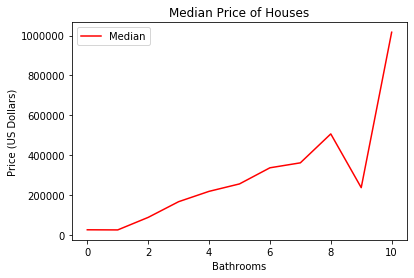

In [24]:
# Create figure and subplot
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)

# Create plot with median data
ax2.plot(price_bath_median.index, price_bath_median, color='r', label='Median')
ax2.legend(loc='best')

# Adding labels to the axis and title
props2 = {'title':'Median Price of Houses',
         'xlabel':'Bathrooms',
         'ylabel':'Price (US Dollars)'}
ax2.set(**props2)

From the figure, the trend shows there is a graudual increase in price as the number of bathrooms increase. That is, until you get to the median price of houses with 10 bathrooms which jumps very high in price.

Quickly comparing the bedrooms plot to the bathrooms plot, it seems the more number of bathrooms the higher the house price was. For example, the median value of the house with 4 bathrooms is around 250,000 dollars whereas the median value of the house with 4 bedrooms is 150,000 dollars.

### Cities

The next area to investigate is cities. To go about this, we wanted to divide each city into buckets depending on number of bedrooms/bathrooms. This is because we wanted to see if certain cities had more or less houses with a larger amount of bedrooms and bathrooms that would cause the price of the house to go up. If we were to soley look at cities and their average price, we wouldn't get a clear picture on where the price was coming from.

First, we need to create the function that will create the levels of bedrooms/bathrooms. The function will create a new column that will contain names dependent on the number of bedrooms/bathrooms. Houses with 0-2 bedrooms/bathrooms is considered low, 3-5 is considered some, 5-7 is considered more, and 8-10 is considered a lot.

In [25]:
# Defining the function name and the input is the dataframe and column to be bucketed
def group_buckets(df_name, column_name):
    
    # Create the bucket cut offs, keeping in mind the left is exclusive
    bin_edge = [0,3,7,10]
    
    # Create names for each bucket
    bin_name = ['Few','Some','A Lot']
    
    # Name the the new column to the original column name and adding Levels to the end
    name = '{} Levels'.format(column_name)
    
    # Creating the new column by cutting the original column into the bins and including the first lowest value in the first bucket
    df_name[name] = pd.cut(df_name[column_name], bin_edge, labels=bin_name, include_lowest=True)
    
    # Return dataframe
    return df_name

We will use the function on the bedroom column first and group the dataframe by city and then the newly formed levels.

In [26]:
# Perform the bucket function on the bedroom column
group_buckets(df_less_bed,'Bedroom')

# Create and display new dataframe that groups by city then bedroom levels
df_city_bed = df_less_bed.groupby(['City','Bedroom Levels']).median()
df_city_bed

C:\Users\ozy8080\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Price  Bedroom  Bathroom  Floors  Parking    Year
City    Bedroom Levels                                                      
Bara    Few               2199.5      0.0       0.0     0.0      0.0  1978.0
        Some                 NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                NaN      NaN       NaN     NaN      NaN     NaN
Bardiya Few                  NaN      NaN       NaN     NaN      NaN     NaN
        Some             30295.0      4.0       1.0     2.0      0.0  2017.0
...                          ...      ...       ...     ...      ...     ...
Surkhet Some                 NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                NaN      NaN       NaN     NaN      NaN     NaN
Tanahu  Few             124500.0      0.0       0.0     2.0      0.0  1978.0
        Some                 NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                NaN      NaN       NaN     NaN      NaN     NaN

[93 rows x 6 columns]

The next thing we will want to do is unstack the dataframe and look at the median prices for each bedroom level. The we can plot a bar chart to see what cities have what bedroom levels and their prices.

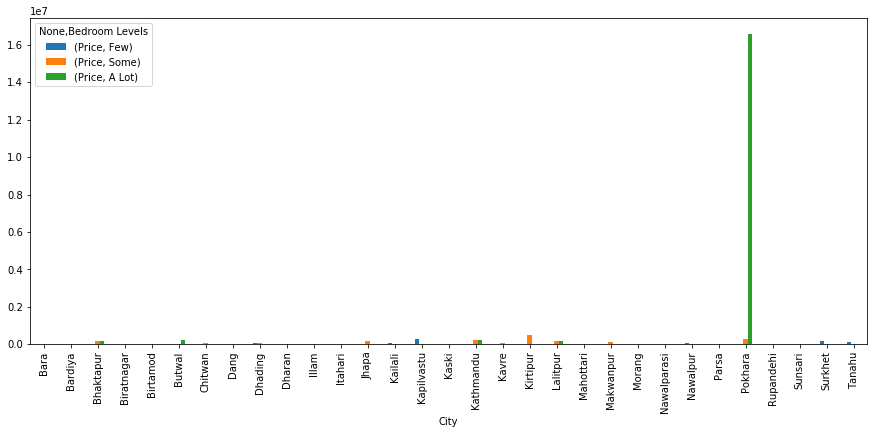

In [27]:
# Create an unstacked dataframe looking at price only
df_city_bed_unstack = df_city_bed[['Price']].unstack()

# Create a bar chart displaying the groups and the buckets
df_city_bed_unstack.plot.bar(figsize=(15,6))

The figure above shows that one city in particular, Pokhara, has housing that have between 8 and 10 bedrooms and have a high median price that is significantly larger than all other cities in Nepal. Besides Pokhara, Kirtipur has housing with between 4 and 7 bedrooms that have the second highest median price compared to the other cities.

Other interesting cities are Bhaktapur and Kathmandu which contains housing with 0-3 and 4-7 bedrooms which all have similar median prices. Most of the other cities have such low housing prices that they hardly appear on the graph.

From this we see that Pokhara have pricier housing, but the price is justified as it has a lot of bedrooms. We also see that cities like Bhaktapur and Kathmandu have housing with similar prices but different number of bedrooms.

Next we will study bathrooms similar to how we studied bedrooms.

In [28]:
# Perform the bucket function on the bathroom column
group_buckets(df_less_bath, 'Bathroom')

# Create and display new dataframe that groups by city then bathroom levels
df_city_bath = df_less_bath.groupby(['City','Bathroom Levels']).median()
df_city_bath

C:\Users\ozy8080\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Price  Bedroom  Bathroom  Floors  Parking    Year
City    Bathroom Levels                                                      
Bara    Few                2199.5      0.0       0.0     0.0      0.0  1978.0
        Some                  NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                 NaN      NaN       NaN     NaN      NaN     NaN
Bardiya Few               30295.0      4.0       1.0     2.0      0.0  2017.0
        Some                  NaN      NaN       NaN     NaN      NaN     NaN
...                           ...      ...       ...     ...      ...     ...
Surkhet Some                  NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                 NaN      NaN       NaN     NaN      NaN     NaN
Tanahu  Few              124500.0      0.0       0.0     2.0      0.0  1978.0
        Some                  NaN      NaN       NaN     NaN      NaN     NaN
        A Lot                 NaN      NaN       NaN     NaN      NaN     NaN

[93 rows x 6 columns]

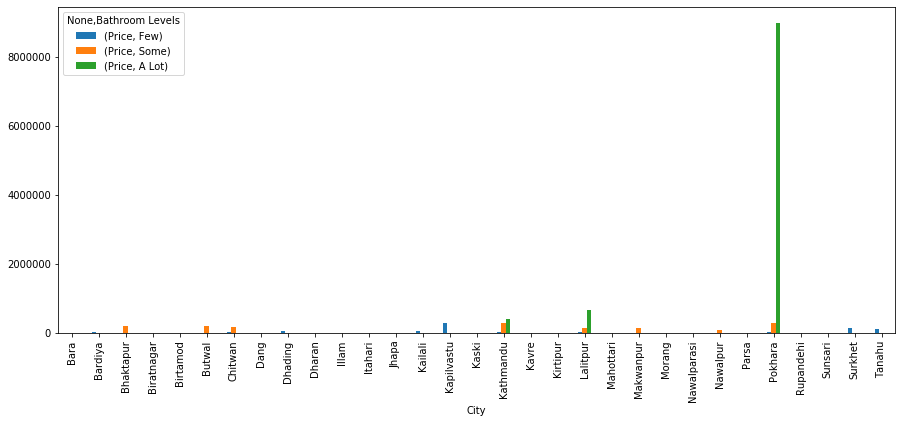

In [29]:
# Create an unstacked dataframe looking at price only
df_city_bath_unstack = df_city_bath[['Price']].unstack()

# Create a bar chart displaying the groups and the buckets
df_city_bath_unstack.plot.bar(figsize=(15,6))

Similar to bedrooms, Pokhara has houses with 8-10 bathrooms who's median price is significantly higher than other houses in other cities. It also has the one of the highest median price for houses with 4-7 bathrooms. The second highest median price for houses with 8-10 bathrooms is Lalitpur.

What we found interesting is the few cities who had relatively few bathrooms, between 0-3, had a high median price for housing. These cities were Kapilvastu, Surkhet, and Tanahu. These three cities did not have any other signigicant houses with more bathrooms and a higher price which leads us to believe there aren't many larger houses in those areas.

After looking to see the connection between cities and pricing with further investigation on bedrooms and bathrooms its easy to see that the city of Pokhara has more expensive housing with lots of bedrooms and bathrooms. Some cities have shown there isn't a huge difference in prices when it comes to the number of bedrooms like Bhaktapur and Kathmandu. Kathmando, however, shows that the higher number of bathrooms the higher the price is. Overall, we can't fully say that knowing where a house is located justifies the price. But knowing what city a house is located and the number of bedrooms and bathrooms can assist in understanding if the price is justified.

### The Direction the House Faces

Although our more serious exploration was directed towards cities. We thought it would be interesting to see if the direction the house faces connects with the price of the house. We were intrigued by this because some cultures place high importance on the way the house faces and where the sun rises and sets.

Prior knowledge tells us the sun rises in the East and sets in the West, but after research, it hardly rises and sets perfectly in those directions. It is more likely to rise and set more north or south of each direction. Because of this homes that face in a wester direction recieve more sun for longer and can be warmer then houses facing the eastern direction. Also from being in the sun longer, the doors and windows can get damaged quicker.

In [30]:
# Group dataframe by face column and display median prices of each group
df.groupby(['Face']).median()['Price']

Face
East          103750.0
North          36520.0
North East     99600.0
North West    149400.0
South          87150.0
South East     39840.0
South West    138195.0
West           37350.0
Name: Price, dtype: float64

Just by examining the groupby method, the lowest median price is for houses facing the North and the highest median price is for houses facing North West. 

Looking at East and West, East had a higher median price. 

But, South West and North West have the two highest median prices, so does facing West really have an impact on price? This data is leading us to say no. 

We won't look at too much further due to the fact that we aren't seeing any ideas or leads to run with. Although a house facing West can lead to warmer temperatures and damaged doors, that does not seem to push prices in a certain direction.

### Road Features

After not having much success with the direction the house faces with the price, we wonder if the road features may contribute to the price of the house. Similar to direction, we will simply look at what our groups of road features look like with the median house prices.

In [31]:
# Group dataframe by road type and display the median price for each group
df.groupby(['Road Type']).median()['Price']

Road Type
 Alley                5602.5
 Blacktopped        146910.0
 Concrete            99600.0
 Gravelled          107900.0
 Paved              141100.0
 Soil Stabilized     20750.0
Name: Price, dtype: float64

Simply looking at the groups, we can see a connection between house prices and the road type. Blacktopped roads may mean more stable, secure neighborhoods whereas an alley may be dangerous and have smaller, less exquisite housing. From this it seems the order of housing prices based on road type, from greatest to least is blacktopped, paved, gravelled, concrete, soil stabilized, and then alley.

The next question we will ask is are the houses with more bedrooms and bathrooms located on the nicer road types like blacktopped, paved, and gravelled? It would be wrong to assume that the road type is the only factor going into the house price, so much like we did when we were examining cities, we will use the bucket function we made to bucket the number of bedrooms and bathrooms for each road type.

In [32]:
# We have already used the bucket function to create the new column

# Create new dataframe that groups by road type and the bedroom levels
df_road_bed = df_less_bed.groupby(['Road Type', 'Bedroom Levels']).median()
df_road_bed

Price  Bedroom  Bathroom  Floors  Parking  \
Road Type        Bedroom Levels                                                 
 Alley           Few               5602.5      0.0       1.0     3.0      0.5   
                 Some                 NaN      NaN       NaN     NaN      NaN   
                 A Lot                NaN      NaN       NaN     NaN      NaN   
 Blacktopped     Few              31540.0      0.0       0.0     3.0      0.0   
                 Some            290500.0      5.0       4.0     3.0      2.0   
                 A Lot           265600.0      9.0       5.0     3.0      1.0   
 Concrete        Few              24070.0      0.0       0.0     3.0      0.0   
                 Some            178450.0      5.0       3.0     2.5      1.0   
                 A Lot           269750.0      8.0       4.0     4.0      2.5   
 Gravelled       Few              24900.0      0.0       0.0     3.0      0.0   
                 Some            186750.0      5.0       4.0     3.0      1.0   
                 A Lot           164340.0      8.0       4.0     3.0      1.0   
 Paved           Few              18675.0      0.0       0.0     3.0      0.0   
                 Some            213725.0      5.0       4.0     3.0      1.0   
                 A Lot           332000.0      8.0       6.0     4.0      3.0   
 Soil Stabilized Few              14940.0      0.0       0.0     3.0      0.0   
                 Some            203350.0      5.0       3.0     3.0      2.0   
                 A Lot           151475.0      9.0       1.5     7.0      1.0   

                                   Year  
Road Type        Bedroom Levels          
 Alley           Few             1977.5  
                 Some               NaN  
                 A Lot              NaN  
 Blacktopped     Few             2004.0  
                 Some            2012.0  
                 A Lot           2008.0  
 Concrete        Few             2004.0  
                 Some            2015.0  
                 A Lot           2007.5  
 Gravelled       Few             2004.0  
                 Some            2018.0  
                 A Lot           2004.0  
 Paved           Few             2004.0  
                 Some            2005.5  
                 A Lot           2004.0  
 Soil Stabilized Few             2004.0  
                 Some            2013.0  
                 A Lot           2003.5

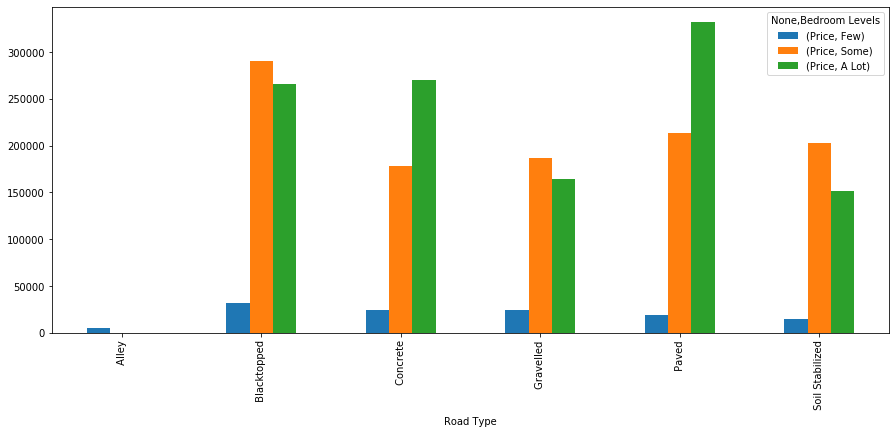

In [33]:
# Unstack the dataframe and only look at the median prices
df_road_bed_unstack = df_road_bed[['Price']].unstack()

# Graph a simple bar graph to show the grouping and median prices
df_road_bed_unstack.plot.bar(figsize=(15,6))

From this chart we can clearly see houses with 3-6 and 7-10 bedrooms are not located in alleys. Paved roads have the highest median price for houses with 7-10 bedrooms. Graveled roads and soil stabilized roads have lower median prices for houses with 3-6 and 7-10 bedrooms. 

It seems that blacktopped, concrete, and paved carry some of the more higher end, pricier houses with more bedrooms where graveled and soil stabilized have the mid-range priced housing. The next thing to look at is if the number of bathrooms show similar results as the bedrooms.

In [34]:
# We have already used the bucket function to create the new column

# Create new dataframe that groups by road type and the bathroom levels
df_road_bath = df_less_bath.groupby(['Road Type', 'Bathroom Levels']).median()
df_road_bath

Price  Bedroom  Bathroom  Floors  \
Road Type        Bathroom Levels                                            
 Alley           Few              5.602500e+03      0.0       1.0    3.00   
                 Some                      NaN      NaN       NaN     NaN   
                 A Lot                     NaN      NaN       NaN     NaN   
 Blacktopped     Few              3.735000e+04      0.0       0.0    3.00   
                 Some             3.112500e+05      5.0       5.0    3.00   
                 A Lot            7.677500e+05     10.0       9.0    4.00   
 Concrete        Few              2.739000e+04      0.0       0.0    3.00   
                 Some             2.386250e+05      6.5       4.0    2.75   
                 A Lot                     NaN      NaN       NaN     NaN   
 Gravelled       Few              4.980000e+04      0.0       0.0    3.00   
                 Some             2.075000e+05      5.0       5.0    3.00   
                 A Lot            8.399600e+06      8.0       9.0    3.50   
 Paved           Few              1.909000e+04      0.0       1.0    3.00   
                 Some             2.593750e+05      5.0       5.0    3.00   
                 A Lot            4.980000e+05     11.5       9.0    4.00   
 Soil Stabilized Few              1.784500e+04      0.0       0.0    3.00   
                 Some             3.838750e+05      5.0       5.0    3.00   
                 A Lot            1.120500e+05      3.0       9.0    3.00   

                                  Parking    Year  
Road Type        Bathroom Levels                   
 Alley           Few                  0.5  1977.5  
                 Some                 NaN     NaN  
                 A Lot                NaN     NaN  
 Blacktopped     Few                  0.0  2004.0  
                 Some                 2.0  2012.0  
                 A Lot                3.0  2010.5  
 Concrete        Few                  0.0  2004.0  
                 Some                 1.0  2009.5  
                 A Lot                NaN     NaN  
 Gravelled       Few                  0.0  2004.0  
                 Some                 1.0  2018.0  
                 A Lot                2.0  2012.5  
 Paved           Few                  1.0  2004.0  
                 Some                 2.0  2012.5  
                 A Lot                2.0  1985.5  
 Soil Stabilized Few                  0.0  2004.0  
                 Some                 3.0  2013.0  
                 A Lot                0.0  2019.0

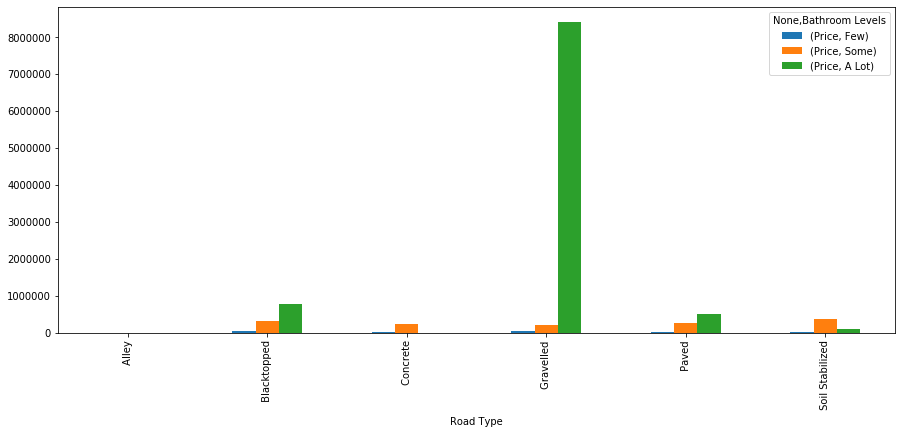

In [35]:
# Unstack the dataframe and only look at the median prices
df_road_bath_unstack = df_road_bath[['Price']].unstack()

# Graph a simple bar graph to show the grouping and median prices
df_road_bath_unstack.plot.bar(figsize=(15,6))

This graph is far different than the preivous one that displayed bedrooms. It seems that Gravelled roads have properties with 7-10 bathrooms that have a very high median price. Beyond the obvious, blacktopped, concrete, and paved show that as the number of bathrooms increase in the household, the higher the price of the house. Soil stabilized however does not show the similar trend. Soil shows that their houses with 3-6 bathrooms have a higher median price than an other number of bathrooms, that could be because the houses with 7-10 bathrooms are very old, run down, out of style and therefore has a lower price.

After looking over the road type and seeing if there is a connection to price, much like when we looked at cities, you cannot look only at the road type to determine wether the price is justified. It is a team effort with the number of bedrooms and bathrooms as well. It seems that the blacktopped, concrete, and paved are connected with higher prices because they also have the houses with more bedrooms and bathrooms than road types like alleys and soil.

The final area we will look at to see if a houses price is justified is the number of amentities is has.

### Number of Amenities

When we were cleaning the data, we decided it would be easier to handle the amenity column by just looking at the number of amenities they have. Before looking at the data, we would assume that the more amenities a house has, the higher the price.

The first thing we will do is just take a look at the groups of number of amentities.

In [36]:
price_amen_median = df.groupby(['Amenities']).median()['Price']
price_amen_median

Amenities
0.0     2.324000e+04
1.0     1.660000e+05
2.0     1.141250e+05
3.0     9.877000e+04
4.0     1.162000e+05
5.0     1.348750e+05
6.0     1.660000e+05
7.0     1.992000e+05
8.0     1.577000e+05
9.0     2.120650e+05
10.0    2.241000e+05
11.0    1.743000e+05
12.0    2.178750e+05
13.0    2.485850e+05
14.0    2.718250e+05
15.0    3.050250e+05
16.0    4.772500e+05
17.0    2.116500e+05
18.0    4.357500e+05
19.0    2.780500e+05
20.0    3.506750e+05
21.0    4.772500e+05
22.0    4.336750e+05
23.0    6.972000e+05
24.0    4.772500e+05
25.0    5.187500e+05
26.0    2.905000e+05
28.0    3.527500e+05
29.0    2.075000e+06
30.0    5.768500e+05
Name: Price, dtype: float64

From the groupby method, we see places ranging from no amenities to 30 amenities. What do these prices look like on a graph?

[Text(0, 0.5, 'Price (US Dollars)'),
 Text(0.5, 0, 'Number of Amenities'),
 Text(0.5, 1.0, 'Median Price of Houses')]

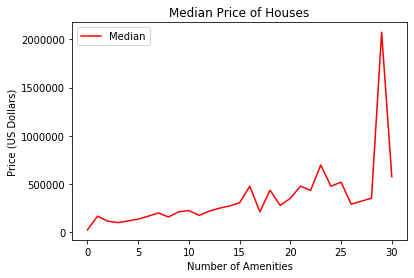

In [37]:
# Create figure and subplot
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

# Create plot with median data
ax3.plot(price_amen_median.index, price_amen_median, color='r', label= 'Median')
ax3.legend(loc='best')

# Adding labels to the axis and title
props3 = {'title':'Median Price of Houses',
         'xlabel':'Number of Amenities',
         'ylabel':'Price (US Dollars)'}
ax3.set(**props3)

The plot above shows that as the number of amenities increase, gradually the price increases. The steep slope going up to a house with 29 amenities might serve as an outlier, but besides that there is a gradual increase in prices.

## Question 1 Conclusions

After looking at bedrooms, bathrooms, city, face, road type, and amenities, our group had a better understanding of how prices are determined for houses in Nepal. It is not just one feature that justifies the price of a house, but a group of features. Initially when we were looking at bedrooms and bathrooms, it seemed that the number of bathrooms had more value than the number of bedrooms. We looked at cities that the houses were located in and agreed that a city alone could not accurately answer our question of if the price is justified. It was a combined effort of city, bedrooms, and bathrooms. This was the similar case for road types as well. We found that some road types had more popularity than others but we wanted to see if it was because bedrooms and bathrooms played a role, which in the end they did. Amenities is also a key role in the price and could easily be seen as the price increased with the number of amenities listed. One feature we investigated than ended up having no connection with price was the way the house faces. We did outside reasearch to see what direction the sun rises and sets and what impact that has on a house's internal temperature and exterior features, but after that research we couldn't see a connection between price and face.

Overall, looking at a house, examining number of bedrooms, bathrooms, amenities, and the city can contribute to the price of a house.

<h1>Question 2</h1>
<p>In question 2, we examined what the best buying options would be for a Nepalese buyer on the basis of their economic status, that is, if they belong to the lower, middle, or upper class</p>
<p>This question required external research and data that was not presented in the dataset we received, so we did some digging on the Internet and found the following information:</p>
<ul>
    <li>The average annual salary in Nepal is 113,000 NPR, or around 932 USD</li>
    <li>The minimum salary is around 14,700 NPR annually (or 121 USD)</li>
    <li>The maximum salary is around 480,000 NPR annually (or 3,959 USD)</li>
</ul>
<p>It is difficult to define where exactly the boundaries exist for separating the lower, middle, and upper class, as there has not been much research into these definitions in Nepal. But taking some averages, such as an average annual income of 113,000 NPR, and using the Pew Research benchmarks for lower and upper class, we can create the following definitions:
<h5>Class Definitions</h5>
<ul>
    <li>Lower: &lt;72,700 NPR (600 USD) per year</li>
    <li>Middle: &gt;=72,700 NPR (600 USD) &amp; &lt;310,220 NPR (2,560 USD) per year</li>
    <li>Upper: &gt;=310,220 NPR (2,560 USD) per year</li>
</ul>

In [38]:
#Formula for deciding how much one should spend on a house
#Basic rule of thumb is to take your income and multiply it by 2.5 to find your limit for purchasing
lowerRange = 600*2.5
upperRange = 2560*2.5
lower = df['Price']<lowerRange
middle = df['Price'].between(lowerRange, upperRange)
upper = df['Price']>=upperRange

In [39]:
#Display those houses that are within the purchasing power of those in the lower class
print("Houses within purchasing power of lower class (<$",lowerRange,")")
#Sort them based on price
bestLower = df[lower].sort_values(by=["Price"],ascending=True)
#Take only those with more than 1 bedroom and less than 10 bedrooms
low_bed = df['Bedroom'].between(1,10)
bestLower[low_bed]

Houses within purchasing power of lower class (<$ 1500.0 )


C:\Users\ozy8080\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Amenities
519,Kathmandu,1.992,5,5,3.0,1,East,2019.0,5,14 Feet,Gravelled,1
1991,Chitwan,74.700,1,1,3.0,1,North,2018.0,2,6 Meter,NaN,10
428,Lalitpur,83.000,1,1,3.0,0,East,1995.0,5,0 Feet,NaN,0
993,Bhaktapur,99.600,2,1,2.0,0,West,2003.0,7,15 Feet,Blacktopped,0
405,Chitwan,107.900,2,2,3.0,1,West,1962.0,4,19 Meter,Alley,0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,Kathmandu,1411.000,3,4,7.0,2,East,2004.0,7,20 Feet,Blacktopped,17
1367,Lalitpur,1452.500,4,3,2.0,1,East,1989.0,7,15 Feet,Concrete,11
1530,Kathmandu,1452.500,4,3,2.0,3,North,2004.0,5,13 Feet,NaN,6
874,Lalitpur,1494.000,5,0,3.0,2,East,1995.0,5,14 Feet,Blacktopped,3


In [40]:
#Display those houses that are within the purchasing power of those in the middle class
print("Houses within purchasing power of middle class (>=$",lowerRange," - <$",upperRange,")")
#Sort them based on price
bestMiddle = df[middle].sort_values(by=["Price"],ascending=True)
#Take only those with more than 1 bedroom and less than 10 bedrooms and those with Amenities above 5
beds_amens=((df['Amenities']>5) & (df['Bedroom'].between(1,10)))
bestMiddle[beds_amens]

Houses within purchasing power of middle class (>=$ 1500.0  - <$ 6400.0 )


C:\Users\ozy8080\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Amenities
1464,Lalitpur,1535.5000,5,5,3.0,0,East,1995.0,2,14 Feet,NaN,9
379,Kathmandu,1660.0000,5,4,3.0,2,South,2004.0,5,0 Feet,NaN,12
406,Kathmandu,1660.0000,4,4,3.0,2,East,2004.0,5,0 Feet,NaN,6
327,Kathmandu,1660.0000,5,4,3.0,2,East,1957.0,5,14 Feet,Blacktopped,12
1468,Lalitpur,1660.0000,5,4,3.0,0,South East,1995.0,5,20 Feet,NaN,6
1835,Lalitpur,1660.0000,5,5,3.0,0,South East,1995.0,5,15 Feet,NaN,8
2192,Kathmandu,1660.0000,4,5,3.0,2,North East,2010.0,7,0 Feet,NaN,13
1863,Kathmandu,1826.0000,2,3,3.0,0,North East,2004.0,7,0 Feet,NaN,6
839,Lalitpur,1950.5000,3,3,10.0,2,South,1995.0,7,20 Feet,Blacktopped,17
2049,Lalitpur,2075.0000,5,3,3.0,2,East,2018.0,5,20 Feet,NaN,13


In [41]:
#Display those houses that are within the purchasing power of those in the upper class
print("Houses within purchasing power of upper class (>=$",upperRange,")")
#Sort them based on price
bestUpper = df[upper].sort_values(by=["Price"],ascending=True)
#Take only those with more than 1 bedroom and less than 15 bedrooms and those with Amenities above 5
beds_amens=((df['Amenities']>5) & (df['Bedroom'].between(1,10)))
bestUpper[beds_amens]

Houses within purchasing power of upper class (>=$ 6400.0 )


C:\Users\ozy8080\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Area,Road Width,Road Type,Amenities
331,Kathmandu,6.557000e+03,6,7,3.0,10,East,2008.0,2,24 Feet,Blacktopped,14
1905,Lalitpur,1.245000e+04,4,4,3.0,5,North East,1995.0,7,12 Feet,NaN,6
528,Lalitpur,3.071000e+04,5,4,3.0,9,South,1995.0,2,8 Feet,Blacktopped,9
1140,Lalitpur,3.984000e+04,2,1,1.0,1,West,1961.0,5,13 Feet,Gravelled,9
2204,Lalitpur,5.395000e+04,4,3,3.0,5,North,1995.0,2,30 Feet,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...
41,Kathmandu,2.075000e+06,6,5,3.0,10,East,2004.0,2,15 Feet,NaN,8
729,Kathmandu,2.407000e+06,6,5,2.0,20,East,2011.0,2,15 Feet,Blacktopped,23
647,Kathmandu,2.490000e+06,4,4,3.0,0,East,2004.0,2,20 Feet,Blacktopped,25
769,Kathmandu,3.320000e+06,6,6,3.0,20,East,2016.0,5,20 Feet,Blacktopped,18


<p>The three dataframe segments above show us what we need to see to start, a list of the housing based on the purchasing power of the individual. But we felt as though we could drill down further to figure out trends in pricing</p>
<p>Below, we create a function to group the different cities on the basis of class. We use the ranges from earlier to define our edges, and separate each city based on how many properties they have of each class, and what that median price range is.</p>

In [42]:
def group_classes(df_name, col_name):
    class_edges=[0,lowerRange,upperRange,upperRange*2]
    class_names=["Lower","Middle","Upper"]
    name = "Class"
    df_name[name] = pd.cut(df_name[col_name], class_edges, labels=class_names)
    
    return df_name

In [43]:
group_classes(df,'Price')
cityByClass = df.groupby(['City','Class']).agg({
    'Price':[np.median, np.size]})
cityByClass

Price     
                median size
City    Class              
Bara    Lower    830.0  1.0
        Middle  2324.0  3.0
        Upper      NaN  NaN
Bardiya Lower      NaN  NaN
        Middle     NaN  NaN
...                ...  ...
Surkhet Middle     NaN  NaN
        Upper      NaN  NaN
Tanahu  Lower      NaN  NaN
        Middle     NaN  NaN
        Upper      NaN  NaN

[96 rows x 2 columns]

For example, above we can see that the city of Bara has four houses for sale in the Lower class range, with a median price of 18 USD.


Next we can plot these numbers on a horizontal bar graph. We note that most of the properties, are located in the city of Kathmandu, with a high number of those being lower class and middle class houses. Lalitpur also has quite a few houses that fall in the lower class range

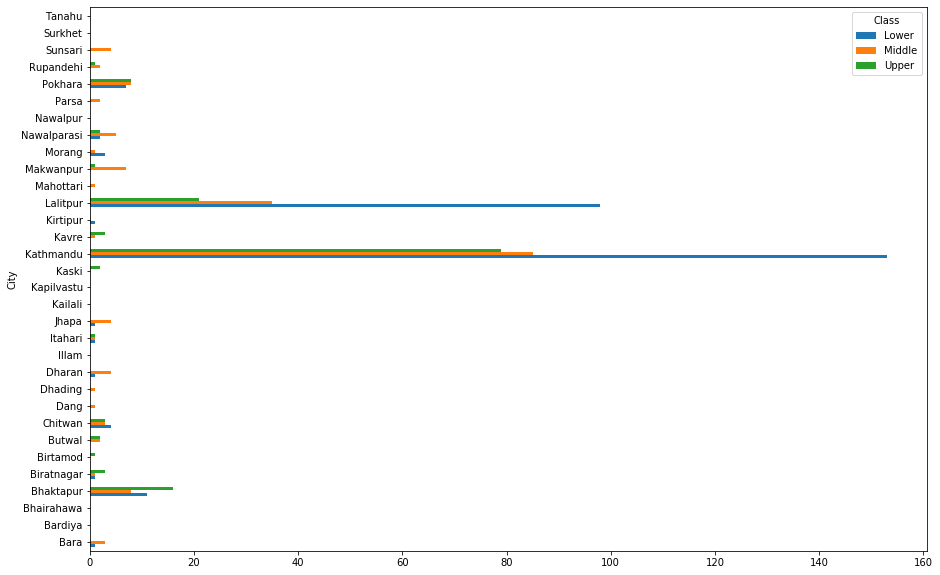

In [44]:
cityByClassUnstack = cityByClass[('Price','size')].unstack()
cityByClassUnstack.plot.barh(figsize=(15,10))

Question 2 Conclusions
After examining the data for question two, it is apparent how most of the properties available are in the lower class range. Following that, a decent portion of houses are in the middle class range, and then only a few houses are in the upper class range. This makes sense due to the poverty levels in Nepal, with an average annual salary of only around 1000 USD.

When graphing our data, we can see the large amounts of houses for sale in the bigger cities, such as Kathmandu and Lalitpur. Again, most of those houses for sale fall in the lower class region of sales.

# Modeling

The basic idea behind modeling is that by connecting information you can predict part of the information. In terms of this data, we will be trying to predict the price of the houses. To start off we can look at just the number of bedrooms in a house. Our intuition tells us that a house with more bedrooms will most likely cost more money. The average number of bedrooms in our data set is 2.7, so we will round up to 3. Here will be our first decision if a house has more than 3 bedrooms it will cost 300,000 and a house with less will cost 200,000. This is called a decison tree, but there are many more factors of price than bedrooms. To make our tree more accurate we will allow for more decisions or "splits". 

In [45]:
#We are trying to predict the price so it our "prediction target" and it will be demoted with y
y = df.Price

#The other factors that determine price are called the "features"
df_features = ['Bedroom', 'Bathroom', 'Floors', 'Area', 'Amenities']

#We will then name this data X
X = df[df_features]

# Building the Model

To build the model we will introduce a new library called scikit-learn.

There are four steps to building a model:

__Define:__ Choose the type model you will use. We are going to use a decision tree.

__Fit:__ Add your prediction target and features.

__Predict:__ Visualize predicitons.

__Evaluate:__ Look at the accuracy of the data and determine how to improve it.


In [46]:
#import scikit-learn
from sklearn.tree import DecisionTreeRegressor

#Define our model and set the random state to 1 to get consistent results.
df_model = DecisionTreeRegressor(random_state=1)

#Fit our model
df_model.fit(X, y)

#Make predictions
print(df_model.predict(X.head()))

#print the first 5 of the actual price
print(df['Price'].head())

[ 788500.  664000.  581000. 1079000.  788500.]
0     747000.0
1     664000.0
2     581000.0
3    1079000.0
4     830000.0
Name: Price, dtype: float64


## Model Validation

Looking at the tree's prediticion compared to the actual values it is pretty close but not perfect. How can we improve it? One thing that we can look at later is adding more features but for now we will loo at the Mean Absolute Error or MAE. The formula for this metric is __error = actual - predicted__. So in the case of our first entry our MAE is 747000 - 788500 = 41500, we use the absolute value as well. This way we have some sort of data to look at and say our predicition is off by so much. 

In [47]:
from sklearn.metrics import mean_absolute_error

predicted_prices = df_model.predict(X)
mean_absolute_error(y, predicted_prices)

6260376750.62242

#### Not So Close
So as we can see it is quite a ways off from being perfect. Even though our first few predictions looked close overall it is way off, but we can still improve from here.

To this we will use a new function train_test_split which will split our data into two pieces. Some will be used for predicting and some will be used for our validation. This way we can create a model better suited to be used on new data.

In [48]:
from sklearn.model_selection import train_test_split

#split data and set a random state to ensure consistent splits
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

#Follow steps to build model: define, fit, predict
df_model = DecisionTreeRegressor()

df_model.fit(train_X, train_y)

val_predictions = df_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

4564725191.477013


#### Getting Closer
Our new MAE is a huge improvement upon the last but it is still not very accurate. In models we can overfit or underfit data. Overfitting is what we mentioned earlier where the model is so specific to the current data set it will be bad at interpreting new data. With our data still being so far off our problem is more likely to be underfitting. This is when even after splitting there is still too wide a variety of data to make predictions from. To fix this we can set how deep we want the tree and how many nodes it will have.

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

#function to find the MAE with specified nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

#compare MAE amound different node values
for max_leaf_nodes in [5, 50, 500, 5000]:
    test_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d \t\t MAE: %d" %(max_leaf_nodes, test_mae))

Max leaf nodes: 5 		 MAE: 5332027256
Max leaf nodes: 50 		 MAE: 4564713866
Max leaf nodes: 500 		 MAE: 4564720370
Max leaf nodes: 5000 		 MAE: 4564720578


From this we can see that the best number of nodes to use for our data is 50. Still even with specifing nodes we are way off, this is where sklearn becomes even more valiable. We can easily plug in a new model to use. This time we will use linear regression which is implememted using the same ideas as the tree. 

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#create linear regression model
linear_reg_model = linear_model.LinearRegression()

linear_reg_model.fit(train_X, train_y)

linear_reg_predict = linear_reg_model.predict(val_X)

linear_reg_mae = mean_squared_error(val_y, linear_reg_predict)

print("MAE: %.2f" %linear_reg_mae)

MAE: 2433848435775823675392.00


## Modeling Conclusion
There are are over 100 different models to choose from in the sklearn library. Finding the right model for your project depends on what you are trying to predict and what your data is like. Our data has a few large outliers that sway our MAE. For the most of the data our tree model was quite close to the actual values. 

# Conclusion
In this project we started with a data set about Napali housing prices with the goal of creating a notebook that would make the data understandable for a wide audience. The first step was to clean and wrangle the data. After that was done we were able to examine the data and create charts and models to help explain it. We then asked our two questions:
1. Is the price of each property justified?
2. What is the best value for someone of lower, middle, and upper class?

#### Cleaning
To clean up our data we started by removing some columns of data that either had incomplete data or were not relevant in helping our goals. The columns we kept we also had to work on. For the price column we converted the Rupee to USD so our American audience would understand it more. Another big fix in our data was converting the calender the Nepalese use to the stand Gregorian Calendar used in the US. Once again more converstion was needed, and we converted the Napalese measuring system. After all of this data was cleaned we were able to move to our questions.

#### Question 1
For the first question we looked at each factor that we thought could help contribute to the price: bedrooms, bathrooms, city, face, road type, and amenities. All play a factor in the cost but we created charts to see if some held more weight in the pricing than others. From this we learned that the correlation in road types had more to do with the other features than the road, and it was not that useful. Face also did not help to determine the price at all. After all our testing we found that bedrooms, bathrooms, amenties, and city help to determine the price of houses the most.

#### Question 2
Our goal for question 2 was to find the ebst value for someone in each class. Before we could find the best value, we first had to define what is lower, middle, and upper class. After doing some outside research our class definitions came to be 

Lower: <72,700 NPR (600 USD) per year

Middle: >=72,700 NPR (600 USD) & <310,220 NPR (2,560 USD) per year

Upper: >=310,220 NPR (2,560 USD) per year

The next step after that was to seperate our data into the houses each class could afford. Just by looking at the average annual salary you can begin to understand how this data is going to shape up. With such a low annual salary it only makes sense that the majority of the population can only afford cheaper houses making the majority of our houses in the lower class bracket.

#### Modeling
To create our models we started with the most basic decision tree and worked from there. We added more splits to our tree to allow it to work with more data. This is also where the data cleaning process becomes very important. If the data was still very messy the models would have a difficult time understanding the data and create poor models. After creating so many leaf nodes we tested the accuracy of our models with the MAE and improved from there. We tested for overfitting and underfitting to find the optimal amount of nodes to use for our data set.



# Contributions
***Introduction + Cleanup*** - Osvaldo Sanchez

***Question 1*** - Megan Butts

***Question 2*** - Nick Mueth

***Modeling + Conclusion*** - Chas Mosely